# <font color="purple"><h3 align="center">DataFrame Basics Tutorial</h3></font>

## **Dataframe is most commonly used object in pandas. It is a table like datastructure containing rows and columns similar to excel spreadsheet**

In [23]:
import pandas as pd
weather_data = {
    'day': ['1/1/2017','1/2/2017','1/3/2017','1/4/2017','1/5/2017','1/6/2017'],
    'temperature': [32,35,28,24,32,31],
    'windspeed': [6,7,2,7,4,2],
    'event': ['Rain', 'Sunny', 'Snow','Snow','Rain', 'Sunny']
}
df = pd.DataFrame(weather_data)

In [3]:
df.shape # rows, columns = df.shape

(6, 4)

## <font color='blue'>Rows</font>

In [24]:
df.head() # df.head(3)

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain


In [25]:
df.tail() # df.tail(2)

,day,temperature,windspeed,event
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [26]:
df[1:3]

,day,temperature,windspeed,event
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


## <font color='blue'>Columns</font>

In [27]:
df.columns

Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')

In [28]:
df['day'] # or df.day

,day
0,1/1/2017
1,1/2/2017
2,1/3/2017
3,1/4/2017
4,1/5/2017
5,1/6/2017


In [29]:
#see what's the type of a dataframe column, e.g 'day'
print(df['day'].dtype)

object


In [30]:
#show day and temperature of dataframe
df[['day','temperature']]

,day,temperature
0,1/1/2017,32
1,1/2/2017,35
2,1/3/2017,28
3,1/4/2017,24
4,1/5/2017,32
5,1/6/2017,31


## <font color='blue'>Operations On DataFrame</font>

In [32]:
df['temperature'].max()

35

In [33]:
df[df['temperature']>32]

,day,temperature,windspeed,event
1,1/2/2017,35,7,Sunny


In [31]:
df['day'][df['temperature'] == df['temperature'].max()] # Kinda doing SQL in pandas

,day
1,1/2/2017


In [34]:
df[df['temperature'] == df['temperature'].max()] # Kinda doing SQL in pandas

,day,temperature,windspeed,event
1,1/2/2017,35,7,Sunny


In [35]:
#Find standard deviation of temperature
df['temperature'].std()

3.8297084310253524

In [36]:
df['event'].max() # But mean() won't work since data type is string

'Sunny'

In [37]:
df.describe()

,temperature,windspeed
count,6.000000,6.000000
mean,30.333333,4.666667
std,3.829708,2.338090
min,24.000000,2.000000
25%,28.750000,2.500000
50%,31.500000,5.000000
75%,32.000000,6.750000
max,35.000000,7.000000


**Google pandas series operations to find out list of all operations**
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

## <font color='blue'>set_index</font>

In [38]:
df.set_index('day')

,temperature,windspeed,event
day,,,
1/1/2017,32,6,Rain
1/2/2017,35,7,Sunny
1/3/2017,28,2,Snow
1/4/2017,24,7,Snow
1/5/2017,32,4,Rain
1/6/2017,31,2,Sunny


In [42]:
df.set_index('day', inplace=True)
df

,temperature,windspeed,event
day,,,
1/1/2017,32,6,Rain
1/2/2017,35,7,Sunny
1/3/2017,28,2,Snow
1/4/2017,24,7,Snow
1/5/2017,32,4,Rain
1/6/2017,31,2,Sunny


In [40]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [43]:
df.loc['1/2/2017']

,1/2/2017
temperature,35
windspeed,7
event,Sunny


In [44]:
df.reset_index(inplace=True)
df.head()

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain


In [45]:
df.set_index('event',inplace=True) # this is kind of building a hash map using event as a key
df

,day,temperature,windspeed
event,,,
Rain,1/1/2017,32,6
Sunny,1/2/2017,35,7
Snow,1/3/2017,28,2
Snow,1/4/2017,24,7
Rain,1/5/2017,32,4
Sunny,1/6/2017,31,2


In [46]:
df.loc['Snow']

,day,temperature,windspeed
event,,,
Snow,1/3/2017,28,2
Snow,1/4/2017,24,7


# <font color="purple"><h3 align="center">Pandas Concatenate Tutorial</h3></font>

## <font color='blue'>Basic Concatenation</font>

In [47]:
import pandas as pd

pakistani_weather = pd.DataFrame({
    "city": ["karachi","lahore","peshawar"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
pakistani_weather

,city,temperature,humidity
0,karachi,32,80
1,lahore,45,60
2,peshawar,30,78


In [48]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [7]:
#concatinate US and pakistani weather
weather_combined = pd.concat([pakistani_weather,us_weather])
print(weather_combined)

       city  temperature  humidity
0   karachi           32        80
1    lahore           45        60
2  peshawar           30        78
0  new york           21        68
1   chicago           14        65
2   orlando           35        75


## <font color='blue'>Ignore Index</font>

In [49]:
df = pd.concat([pakistani_weather, us_weather], ignore_index=True)
df

,city,temperature,humidity
0,karachi,32,80
1,lahore,45,60
2,peshawar,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


## <font color='blue'>Concatenation And Keys</font>

In [50]:
df = pd.concat([pakistani_weather, us_weather], keys=["pakistan", "us"])
df

city  temperature  humidity
pakistan 0   karachi           32        80
         1    lahore           45        60
         2  peshawar           30        78
us       0  new york           21        68
         1   chicago           14        65
         2   orlando           35        75

In [51]:
#show city temperate and humidity of us cities
us_weather[['city', 'temperature', 'humidity']]

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [52]:
#show information of pakistani cities (city, temperature, humidity)
pakistani_weather[['city', 'temperature', 'humidity']]

,city,temperature,humidity
0,karachi,32,80
1,lahore,45,60
2,peshawar,30,78


## <font color='blue'>Concatenation Using Index</font>

In [53]:
temperature_df = pd.DataFrame({
    "city": ["karachi","lahore","peshawar"],
    "temperature": [32,45,30],
}, index=[0,1,2])
temperature_df

,city,temperature
0,karachi,32
1,lahore,45
2,peshawar,30


In [54]:
windspeed_df = pd.DataFrame({
    "city": ["lahore","karachi"],
    "windspeed": [7,12],
}, index=[1,0])
windspeed_df

,city,windspeed
1,lahore,7
0,karachi,12


In [55]:
#concatenate the temperature and windspeed of Lahore, Karachi and Peshawar

df_combined = pd.merge(temperature_df, windspeed_df, on='city', how='left')
print(df_combined)

       city  temperature  windspeed
0   karachi           32       12.0
1    lahore           45        7.0
2  peshawar           30        NaN


## <font color='blue'>Concatenate dataframe with series</font>

In [56]:
s = pd.Series(["Humid","Dry","Rain"], name="event")
s

,event
0,Humid
1,Dry
2,Rain


In [57]:
df = pd.concat([temperature_df,s],axis=1)
df

,city,temperature,event
0,karachi,32,Humid
1,lahore,45,Dry
2,peshawar,30,Rain


## <font color="maroon"><h4 align="center">Pandas Group By</font>

In [69]:
import pandas as pd

df= pd.read_csv("weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2024,new york,32,6,Rain
1,1/2/2024,new york,36,7,Sunny
2,1/3/2024,new york,28,12,Snow
3,1/4/2024,new york,33,7,Sunny
4,1/1/2024,dubai,90,5,Sunny
5,1/2/2024,dubai,85,12,Fog
6,1/3/2024,dubai,87,15,Fog
7,1/4/2024,dubai,92,5,Rain
8,1/1/2024,paris,45,20,Sunny
9,1/2/2024,paris,50,13,Cloudy


### For this dataset, get following answers,
#### 1. What was the maximum temperature in each of these 3 cities?
#### 2. What was the average windspeed in each of these 3 cities?


In [70]:
g = df.groupby("city")
print(g)

**DataFrameGroupBy object looks something like below,**

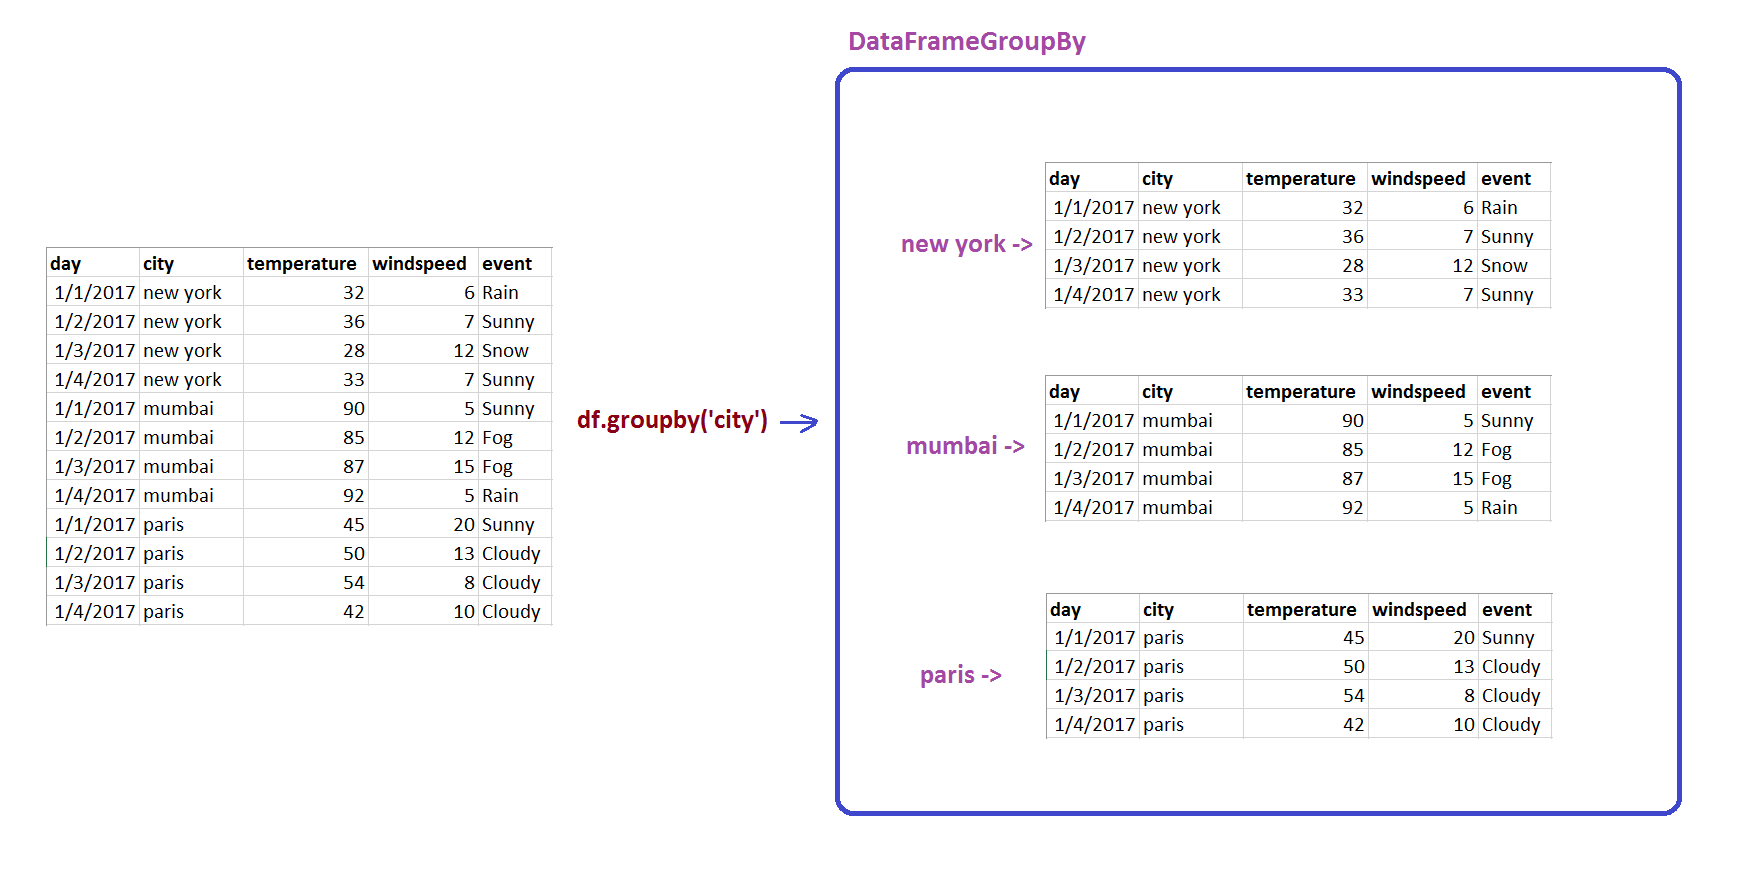

In [72]:
for city, data in g:
    print("city:",city)
    print("\n")
    print("data:",data)

city: dubai


data:         day   city  temperature  windspeed  event
4  1/1/2024  dubai           90          5  Sunny
5  1/2/2024  dubai           85         12    Fog
6  1/3/2024  dubai           87         15    Fog
7  1/4/2024  dubai           92          5   Rain
city: new york


data:         day      city  temperature  windspeed  event
0  1/1/2024  new york           32          6   Rain
1  1/2/2024  new york           36          7  Sunny
2  1/3/2024  new york           28         12   Snow
3  1/4/2024  new york           33          7  Sunny
city: paris


data:          day   city  temperature  windspeed   event
8   1/1/2024  paris           45         20   Sunny
9   1/2/2024  paris           50         13  Cloudy
10  1/3/2024  paris           54          8  Cloudy
11  1/4/2024  paris           42         10  Cloudy


**This is similar to SQL,**

> SELECT * from weather_data GROUP BY city

In [71]:
g.get_group('paris')

,day,city,temperature,windspeed,event
8,1/1/2024,paris,45,20,Sunny
9,1/2/2024,paris,50,13,Cloudy
10,1/3/2024,paris,54,8,Cloudy
11,1/4/2024,paris,42,10,Cloudy


In [73]:
g.min()

,day,temperature,windspeed,event
city,,,,
dubai,1/1/2024,85,5,Fog
new york,1/1/2024,28,6,Rain
paris,1/1/2024,42,8,Cloudy


In [74]:
g.mean(numeric_only=True)

,temperature,windspeed
city,,
dubai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


**This method of splitting your dataset in smaller groups and then applying an operation
(such as min or max) to get aggregate result is called Split-Apply-Combine. It is illustrated in a diagram below**

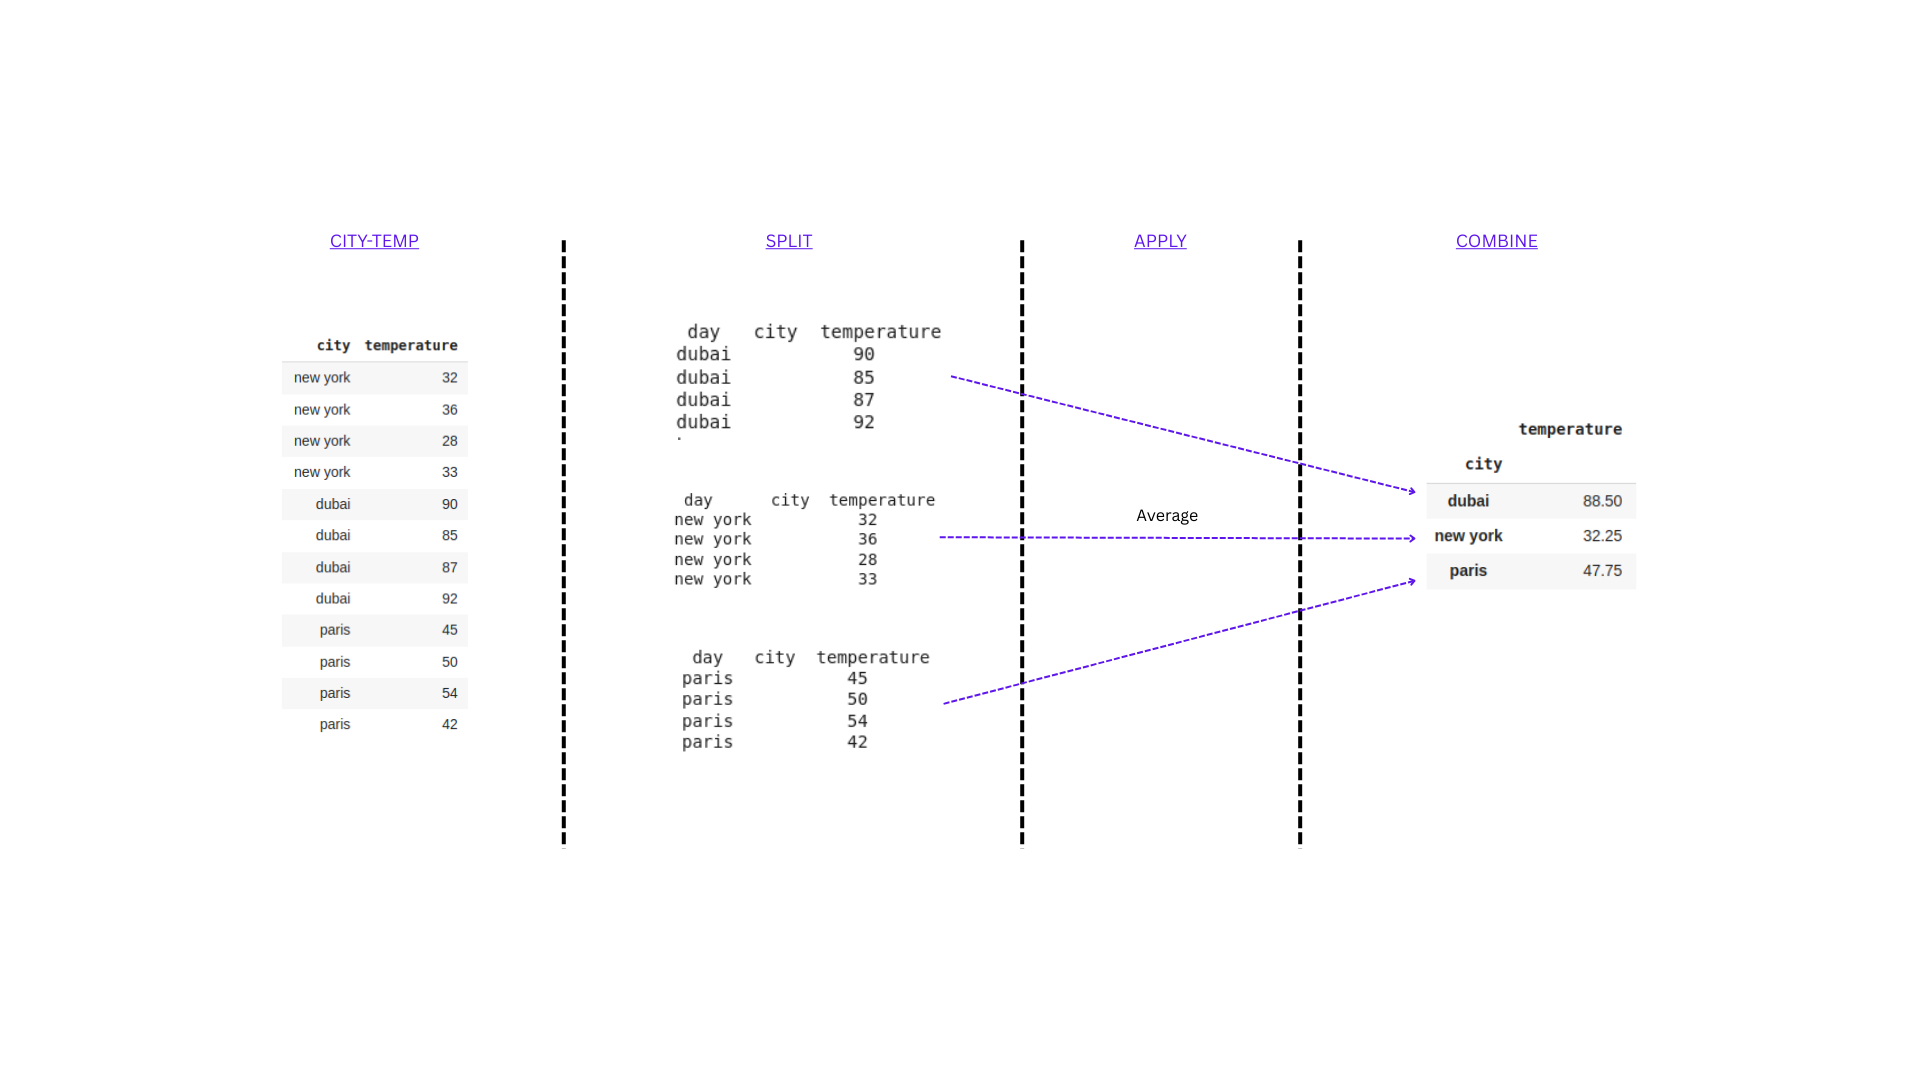

In [75]:
# show the minimum of city group  (g)

df.groupby("city").min()

,day,temperature,windspeed,event
city,,,,
dubai,1/1/2024,85,5,Fog
new york,1/1/2024,28,6,Rain
paris,1/1/2024,42,8,Cloudy


In [77]:
# show statistical information of g
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
dubai            4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
dubai          4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [67]:
g.size()

,0
city,
karachi,1
lahore,1
peshawar,1


# <font color="purple"><h3 align="center">Pandas Merge Tutorial</h3></font>

## <font color='blue'>Basic Merge Using a Dataframe Column</font>

In [78]:
import pandas as pd
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


In [79]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [80]:
#merge df1 and df2 on city
merge_dfs = pd.merge(df1,df2 ,on='city')
merge_dfs

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


## <font color='blue'>Type Of DataBase Joins</font>

<img src="db_joins.jpg" height="800", width="800">

In [81]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [82]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [83]:
df3=pd.merge(df1,df2,on="city",how="inner")
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [86]:
df3=pd.merge(df1,df2,on="city",how="outer")
df3

,city,temperature,humidity
0,baltimore,38.0,NaN
1,chicago,14.0,65.0
2,new york,21.0,68.0
3,orlando,35.0,NaN
4,san diego,NaN,71.0


In [84]:
df3=pd.merge(df1,df2,on="city",how="left")
df3

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,38,NaN


In [85]:
df3=pd.merge(df1,df2,on="city",how="right")
df3

,city,temperature,humidity
0,chicago,14.0,65
1,new york,21.0,68
2,san diego,NaN,71


## <font color='blue'>indicator flag</font>

In [87]:
df3=pd.merge(df1,df2,on="city",how="outer",indicator=True)
df3

,city,temperature,humidity,_merge
0,baltimore,38.0,NaN,left_only
1,chicago,14.0,65.0,both
2,new york,21.0,68.0,both
3,orlando,35.0,NaN,left_only
4,san diego,NaN,71.0,right_only


## <font color='blue'>suffixes</font>

In [ ]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1

In [ ]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2

In [ ]:
df3= pd.merge(df1,df2,on="city",how="outer", suffixes=('_first','_second'))
df3

## <font color='blue'>join</font>

In [89]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1.set_index('city',inplace=True)
df1

,temperature
city,
new york,21
chicago,14
orlando,35


In [90]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2.set_index('city',inplace=True)
df2

,humidity
city,
chicago,65
new york,68
orlando,75


In [91]:
import pandas as pd
import numpy as np
df = pd.read_csv("weather.csv")
df

,date,city,temperature,humidity
0,5/1/2024,new york,65,56
1,5/2/2024,new york,66,58
2,5/3/2024,new york,68,60
3,5/1/2024,dubai,75,80
4,5/2/2024,dubai,78,83
5,5/3/2024,dubai,82,85
6,5/1/2024,beijing,80,26
7,5/2/2024,beijing,77,30
8,5/3/2024,beijing,79,35


In [92]:
df.pivot(index='city',columns='date')

temperature                   humidity                  
date        5/1/2024 5/2/2024 5/3/2024 5/1/2024 5/2/2024 5/3/2024
city                                                             
beijing           80       77       79       26       30       35
dubai             75       78       82       80       83       85
new york          65       66       68       56       58       60

In [93]:
df.pivot(index='city',columns='date',values="humidity")

date,5/1/2024,5/2/2024,5/3/2024
city,,,
beijing,26,30,35
dubai,80,83,85
new york,56,58,60


In [94]:
df.pivot(index='date',columns='city')

temperature                humidity               
city         beijing dubai new york  beijing dubai new york
date                                                       
5/1/2024          80    75       65       26    80       56
5/2/2024          77    78       66       30    83       58
5/3/2024          79    82       68       35    85       60

In [95]:
#show humidity of each city.
df.pivot(index='date',columns='city',values="humidity")

city,beijing,dubai,new york
date,,,
5/1/2024,26,80,56
5/2/2024,30,83,58
5/3/2024,35,85,60


In [97]:
import pandas as pd
import numpy as np
df = pd.read_csv("weather_data.csv")
df

,index,day,temperature,windspeed,event
0,0,1/1/2017,32,6,Rain
1,1,1/2/2017,35,7,Sunny
2,2,1/3/2017,28,2,Snow
3,3,1/4/2017,24,7,Snow
4,4,1/5/2017,32,4,Rain
5,5,1/6/2017,31,2,Sunny


In [99]:
#replace all the negative values with NaN
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)

Index(['index', 'temperature', 'windspeed'], dtype='object')


In [101]:
#Event column it of type string, you should replace 0 with
df['event'] = df['event'].replace('0', np.nan)
df

,index,day,temperature,windspeed,event
0,0,1/1/2017,32,6,Rain
1,1,1/2/2017,35,7,Sunny
2,2,1/3/2017,28,2,Snow
3,3,1/4/2017,24,7,Snow
4,4,1/5/2017,32,4,Rain
5,5,1/6/2017,31,2,Sunny
